
![](https://img.shields.io/badge/Python-14354C?style=for-the-badge&logo=python&logoColor=white) ![](https://img.shields.io/badge/TensorFlow%20-%23FF6F00.svg?&style=for-the-badge&logo=TensorFlow&logoColor=white) ![](https://img.shields.io/badge/Keras-D00000?style=for-the-badge&logo=Keras&logoColor=white)

In [1]:
from keras.preprocessing.image import ImageDataGenerator
import keras
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
!mkdir Train
!mkdir Test

!mkdir Train/Fake
!mkdir Train/Real

!mkdir Test/Fake
!mkdir Test/Real

In [3]:
# I rearrange the train data so that keras can read it

PATH = "/kaggle/input/signature-verification-dataset/sign_data/train/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Train/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Train/Real".format(PATH+i))
        

In [4]:
# I rearrange the test data so that keras can read it.


PATH = "/kaggle/input/signature-verification-dataset/sign_data/test/"

for i in os.listdir(PATH):
    
    contol = i.split("_")
    
    try:
    
        if contol[1]=="forg":
            
            os.system("cp -r {} Test/Fake".format(PATH+i))
            
    except:
        
        os.system("cp -r {} Test/Real".format(PATH+i))
        

In [5]:
# konumları

train_dir = os.path.join("/kaggle/working/Train") 

test_dir = os.path.join("/kaggle/working/Test") 

In [6]:
train_datagen = ImageDataGenerator(

      # compressing picture pixels between 0.1

      rescale=1./255,

      # Random rotation angle of images in degrees (0-180)

      rotation_range=40,

      # horizontal and vertical scrolling rates of images

      width_shift_range=0.2,

      # horizontal and vertical scrolling rates of images
      height_shift_range=0.2,

      # buckling process

      shear_range=0.2,

      # zoom operation
      zoom_range=0.2,

      # rotate image vertically
      horizontal_flip=True,

      # excess after processing
      # specify how to fill viewportsr
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
train_generator = train_datagen.flow_from_directory(

        # target directory
        train_dir,

        # all images will be resized as (200x200)
        target_size=(200, 200),

        # stack size
        batch_size=64,

        # Since we are using binary_crossentropy
        # binary tags are required.
        class_mode='binary')

Found 1649 images belonging to 2 classes.


In [8]:
test_generator = test_datagen.flow_from_directory(

        test_dir,

        target_size=(200, 200),

        batch_size=64,

        class_mode='binary')

Found 500 images belonging to 2 classes.


Label :  1.0


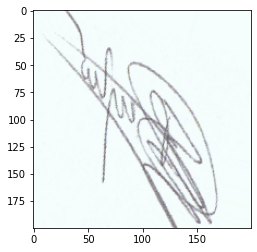

In [9]:
plt.imshow(train_generator[0][0][5])
print("Label : ",train_generator[0][1][5])

Label :  0.0


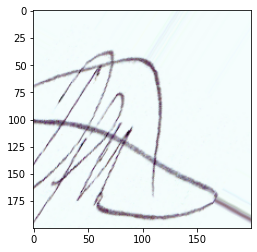

In [10]:
plt.imshow(train_generator[0][0][60])
print("Label : ",train_generator[0][1][60])

In [11]:
class MyModel(tf.keras.Model):

  def __init__(self):
    super(MyModel, self).__init__()
    
    self.cnn1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(3,200,200), data_format='channels_first')
    self.cnn2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu')
    self.cnn3 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu')
    
    self.flatten = tf.keras.layers.Flatten()
    
    self.dense1 = tf.keras.layers.Dense(512, activation='relu')
    self.dense2 = tf.keras.layers.Dense(1, activation='sigmoid')

  def call(self, inputs):
    
    x = self.cnn1(inputs)
    x = self.cnn2(x)
    x = self.cnn3(x)
    x = self.flatten(x)
    x = self.dense1(x)
    x = self.dense2(x)
    
    return x

model = MyModel()

In [12]:
input_shape = (None, 200, 200, 3)
model.build(input_shape)
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              multiple                  28816     
_________________________________________________________________
conv2d_1 (Conv2D)            multiple                  320       
_________________________________________________________________
conv2d_2 (Conv2D)            multiple                  4624      
_________________________________________________________________
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  19071488  
_________________________________________________________________
dense_1 (Dense)              multiple                  513       
Total params: 19,105,761
Trainable params: 19,105,761
Non-trainable params: 0
______________________________________________

In [13]:
model.compile(
    # loss function
    loss="binary_crossentropy",
    
    # Considering the loss created by the data, which is the input of our network,
    # self-update mechanism
    optimizer=tf.keras.optimizers.RMSprop(lr=2e-5),

    # metrics to track during training and testing.
    metrics=["acc"])

In [14]:
# We will get the acc, loss, val_acc, val_loss values ​​from the variable named history.
history = model.fit_generator(

    # training data
    train_generator,

    # the number of instances it will run through until the loop ends (the stack to get)
    steps_per_epoch=train_generator.samples//train_generator.batch_size,

    # number of cycles
    epochs=40,

    verbose=2)


/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
25/25 - 20s - loss: 0.7061 - acc: 0.5110
Epoch 2/40
25/25 - 16s - loss: 0.6893 - acc: 0.5224
Epoch 3/40
25/25 - 15s - loss: 0.6840 - acc: 0.5521
Epoch 4/40
25/25 - 16s - loss: 0.6798 - acc: 0.5621
Epoch 5/40
25/25 - 15s - loss: 0.6729 - acc: 0.5817
Epoch 6/40
25/25 - 16s - loss: 0.6665 - acc: 0.5994
Epoch 7/40
25/25 - 15s - loss: 0.6589 - acc: 0.6038
Epoch 8/40
25/25 - 16s - loss: 0.6590 - acc: 0.6183
Epoch 9/40
25/25 - 15s - loss: 0.6504 - acc: 0.6208
Epoch 10/40
25/25 - 16s - loss: 0.6476 - acc: 0.6189
Epoch 11/40
25/25 - 16s - loss: 0.6469 - acc: 0.6385
Epoch 12/40
25/25 - 15s - loss: 0.6506 - acc: 0.6069
Epoch 13/40
25/25 - 16s - loss: 0.6404 - acc: 0.6397
Epoch 14/40
25/25 - 15s - loss: 0.6393 - acc: 0.6303
Epoch 15/40
25/25 - 16s - loss: 0.6334 - acc: 0.6328
Epoch 16/40
25/25 - 15s - loss: 0.6343 - acc: 0.6347
Epoch 17/40
25/25 - 16s - loss: 0.6405 - acc: 0.6448
Epoch 18/40
25/25 - 15s - loss: 0.6344 - acc: 0.6454
Epoch 19/40
25/25 - 16s - loss: 0.6276 - acc: 0.6467
Ep

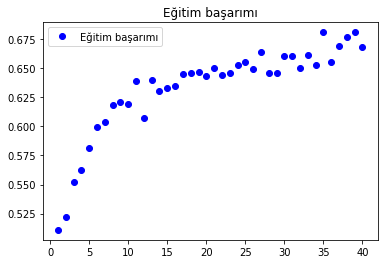

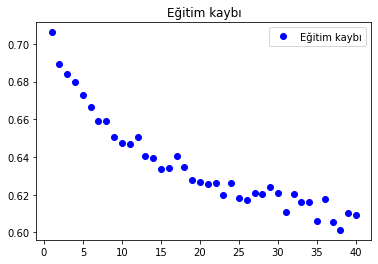

In [15]:
# Training achievement score
acc = history.history["acc"]

# training loss score
loss = history.history["loss"]

# We will plot graphs according to the number of epochs.
epochs = range(1, len(acc) + 1)

# We had the educational success drawn for itself.
plt.plot(epochs, acc, "bo", label="Eğitim başarımı")

# the title of our drawing
plt.title("Eğitim başarımı")

plt.legend()

plt.figure()

# We have drawn the loss of education
plt.plot(epochs, loss, "bo", label="Eğitim kaybı")


# the title of our drawing
plt.title("Eğitim kaybı")

plt.legend()

# the title of our drawing
plt.show()

In [16]:
# Loss and verification with test data
model.evaluate(test_generator)

8/8 [==============================] - 2s 230ms/step - loss: 0.5806 - acc: 0.6720


[0.5806180238723755, 0.671999990940094]

Label :  1.0
Predict :  1.0


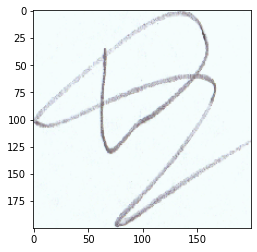

In [17]:
plt.imshow(test_generator[0][0][5])
print("Label : ",test_generator[0][1][5])

test_input = test_generator[0][0][5]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))

Label :  1.0
Predict :  0.0


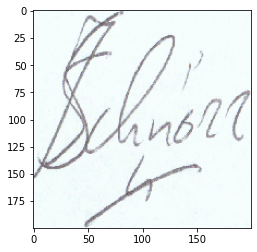

In [18]:
plt.imshow(test_generator[0][0][30])
print("Label : ",test_generator[0][1][30])

test_input = test_generator[0][0][30]
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)
test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = 1
    
else:
    
    pred = 0
    
print("Predict : ",float(pred))

In [19]:

m= "../input/signature-verification-dataset/sign_data/test/049_forg/03_0206049.PNG"
from keras.preprocessing import image
img=image.load_img(m, target_size=(200,200))
img=image.img_to_array(img)
test_input = (img)
test_input = np.expand_dims(test_input, axis=0)
#test_input = np.expand_dims(test_input,axis=0)
#test_input = np.expand_dims(test_input,axis=0)

pred = model.predict(test_input)

if pred>=0.5:
    pred = "Forged"
    
else:
    
    pred = "Real"
    
print("Predict : ",pred)

Predict :  Forged
